In [1]:
import logging
logger = logging.getLogger()
logger.setLevel(logging.CRITICAL)

In [2]:
# Importações essenciais
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt

2025-06-25 08:40:12.559797: I external/local_xla/xla/tsl/cuda/cudart_stub.cc:32] Could not find cuda drivers on your machine, GPU will not be used.
2025-06-25 08:40:12.565490: I external/local_xla/xla/tsl/cuda/cudart_stub.cc:32] Could not find cuda drivers on your machine, GPU will not be used.
2025-06-25 08:40:12.578896: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:467] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
E0000 00:00:1750851612.602582  471801 cuda_dnn.cc:8579] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
E0000 00:00:1750851612.610468  471801 cuda_blas.cc:1407] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
W0000 00:00:1750851612.627951  471801 computation_placer.cc:177] computation placer already registered. Please check linkage and avoid linkin

In [3]:
# Carrega os modelos que treinamos previamente
try:
    model_base = tf.keras.models.load_model('modelo_base.h5')
    model_otimizado = tf.keras.models.load_model('modelo_otimizado.h5')
    print("Modelo Base e Modelo Otimizado carregados com sucesso!")
except Exception as e:
    print(f"Erro ao carregar modelos: {e}")

2025-06-25 08:40:22.280963: E external/local_xla/xla/stream_executor/cuda/cuda_platform.cc:51] failed call to cuInit: INTERNAL: CUDA error: Failed call to cuInit: UNKNOWN ERROR (303)
2025-06-25 08:40:22.374178: W external/local_xla/xla/tsl/framework/cpu_allocator_impl.cc:83] Allocation of 42467328 exceeds 10% of free system memory.
2025-06-25 08:40:22.391063: W external/local_xla/xla/tsl/framework/cpu_allocator_impl.cc:83] Allocation of 42467328 exceeds 10% of free system memory.
2025-06-25 08:40:22.398172: W external/local_xla/xla/tsl/framework/cpu_allocator_impl.cc:83] Allocation of 42467328 exceeds 10% of free system memory.
2025-06-25 08:40:22.527182: W external/local_xla/xla/tsl/framework/cpu_allocator_impl.cc:83] Allocation of 42467328 exceeds 10% of free system memory.
2025-06-25 08:40:22.756143: W external/local_xla/xla/tsl/framework/cpu_allocator_impl.cc:83] Allocation of 42467328 exceeds 10% of free system memory.


Modelo Base e Modelo Otimizado carregados com sucesso!


In [4]:
class_names = ['Alface', 'Almondega', 'Arroz', 'BatataFrita', 'Beterraba', 'BifeBovinoChapa', 'CarneBovinaPanela', 'Cenoura', 'FeijaoCarioca', 'Macarrao', 'Maionese', 'PeitoFrango', 'PureBatata', 'StrogonoffCarne', 'StrogonoffFrango', 'Tomate']

# Função para preparar a imagem
def preparar_imagem(path):
    img = tf.keras.utils.load_img(path, target_size=(150, 150))
    img_array = tf.keras.utils.img_to_array(img)
    img_array = np.expand_dims(img_array, axis=0) / 255.0
    return img, img_array

# Função para rodar os modelos previamente carregados com base na img recebida
def rodar_modelos(img_tensor):
    # Previsão do Modelo Base
    pred_base = model_base.predict(img_tensor)
    classe_prevista_base = class_names[np.argmax(pred_base)]
    confianca_base = np.max(pred_base) * 100

    # Previsão do Modelo Otimizado
    pred_otimizado = model_otimizado.predict(img_tensor)
    classe_prevista_otimizada = class_names[np.argmax(pred_otimizado)]
    confianca_otimizada = np.max(pred_otimizado) * 100

    print("--- Resultados da Demonstração ---")
    print(f"Previsão do Modelo Base: '{classe_prevista_base}' com {confianca_base:.2f}% de confiança.")
    print(f"Previsão do Modelo Otimizado: '{classe_prevista_otimizada}' com {confianca_otimizada:.2f}% de confiança.")

# Testes com imagens selecionadas

Imagem de teste preparada!


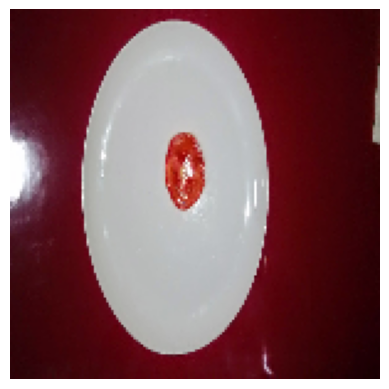

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 121ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 102ms/step
--- Resultados da Demonstração ---
Previsão do Modelo Base: 'BatataFrita' com 20.14% de confiança.
Previsão do Modelo Otimizado: 'Tomate' com 99.98% de confiança.


In [5]:
img_path = 'test_images/imagem_de_teste_tomate.jpg'
img, img_tensor = preparar_imagem(img_path)
print("Imagem de teste preparada!")
plt.imshow(img)
plt.axis('off')
plt.show()
rodar_modelos(img_tensor)

Imagem de teste preparada!


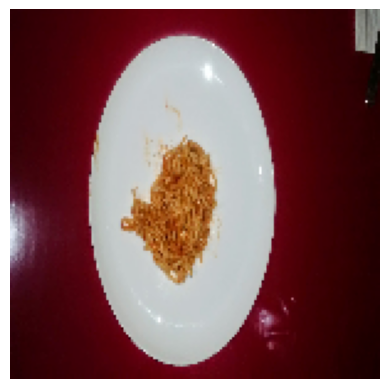

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 44ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 41ms/step
--- Resultados da Demonstração ---
Previsão do Modelo Base: 'Macarrao' com 37.88% de confiança.
Previsão do Modelo Otimizado: 'Macarrao' com 100.00% de confiança.


In [6]:
img_path = 'test_images/imagem_de_teste_macarrao.jpg'
img, img_tensor = preparar_imagem(img_path)
print("Imagem de teste preparada!")
plt.imshow(img)
plt.axis('off')
plt.show()
rodar_modelos(img_tensor)

Imagem de teste preparada!


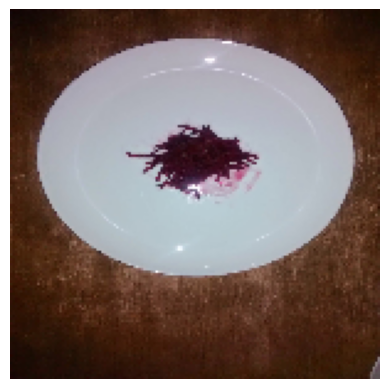

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 45ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 40ms/step
--- Resultados da Demonstração ---
Previsão do Modelo Base: 'Beterraba' com 29.27% de confiança.
Previsão do Modelo Otimizado: 'Beterraba' com 100.00% de confiança.


In [7]:
img_path = 'test_images/imagem_de_teste_beterraba.jpg'
img, img_tensor = preparar_imagem(img_path)
print("Imagem de teste preparada!")
plt.imshow(img)
plt.axis('off')
plt.show()
rodar_modelos(img_tensor)